
# Análisis Exploratorio de Datos: Evolución de Precios de Combustibles

Este notebook presenta un análisis exploratorio de los precios de la gasolina 95 y el diésel en España, considerando factores históricos y tendencias relevantes.

## Objetivos
1. Explorar y limpiar los datos.
2. Analizar la evolución temporal de los precios.
3. Identificar relaciones entre las fluctuaciones de precios y hechos históricos.
4. Extraer insights clave y visualizarlos.

## Descripción del conjunto de datos
- **Año:** Año del registro.
- **Periodo:** Semana del año.
- **Precio de la gasolina 95:** Precio en euros.
- **Precio del diésel:** Precio en euros.


In [12]:

# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
file_path = 'gasofa.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del conjunto de datos
data.head()


,Año,Periodo,Precio de la gasolina 95,Precio del diésel
0,2002,Semana 2,"0,76","0,67"
1,2002,Semana 3,"0,77","0,67"
2,2002,Semana 4,"0,76","0,67"
3,2002,Semana 5,"0,76","0,67"
4,2002,Semana 6,"0,77","0,67"



## Limpieza de Datos
Se realiza la conversión de precios a valores numéricos y el tratamiento de valores nulos.

In [13]:

# Reemplazar comas por puntos y convertir precios a numérico
try:
    # Ajustar nombres de columnas por si tienen espacios
    data.columns = data.columns.str.strip()
    
    # Convertir precios a formato numérico
    data['Precio de la gasolina 95'] = data['Precio de la gasolina 95'].str.replace(',', '.').astype(float)
    data['Precio del diésel'] = data['Precio del diésel'].str.replace(',', '.').astype(float)
    
    # Imputar valores nulos en "Precio del diésel" con la mediana
    data['Precio del diésel'].fillna(data['Precio del diésel'].median(), inplace=True)

    # Comprobación de valores nulos
    print(data.isnull().sum())
except KeyError as e:
    print(f"Error: {e}. Verifica los nombres de las columnas.")
except ValueError as e:
    print(f"Error de conversión: {e}. Revisa los datos no numéricos.")



Año                         0
Periodo                     0
Precio de la gasolina 95    0
Precio del diésel           0
dtype: int64


C:\Users\Trabajo\AppData\Local\Temp\ipykernel_19480\3074082258.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## Exploración Inicial
Se analizan estadísticas descriptivas y la presencia de valores atípicos.

In [14]:

# Estadísticas descriptivas

print(data.head())
print(data.tail())
print("=============================")
print(data.dtypes.value_counts())
print(data.describe(include='all'))
print(data.nunique().sort_values(ascending=False))
print("=============================")



    Año   Periodo  Precio de la gasolina 95  Precio del diésel
0  2002  Semana 2                      0.76               0.67
1  2002  Semana 3                      0.77               0.67
2  2002  Semana 4                      0.76               0.67
3  2002  Semana 5                      0.76               0.67
4  2002  Semana 6                      0.77               0.67
       Año    Periodo  Precio de la gasolina 95  Precio del diésel
1129  2024  Semana 40                      1.48               1.36
1130  2024  Semana 41                      1.48               1.36
1131  2024  Semana 42                      1.50               1.38
1132  2024  Semana 43                      1.51               1.39
1133  2024  Semana 44                      1.51               1.39
float64    2
int64      1
object     1
Name: count, dtype: int64
                Año   Periodo  Precio de la gasolina 95  Precio del diésel
count   1134.000000      1134               1134.000000        1134.000000
uniqu


## Distribución de los Precios
Visualizamos las distribuciones de los precios de la gasolina y el diésel.

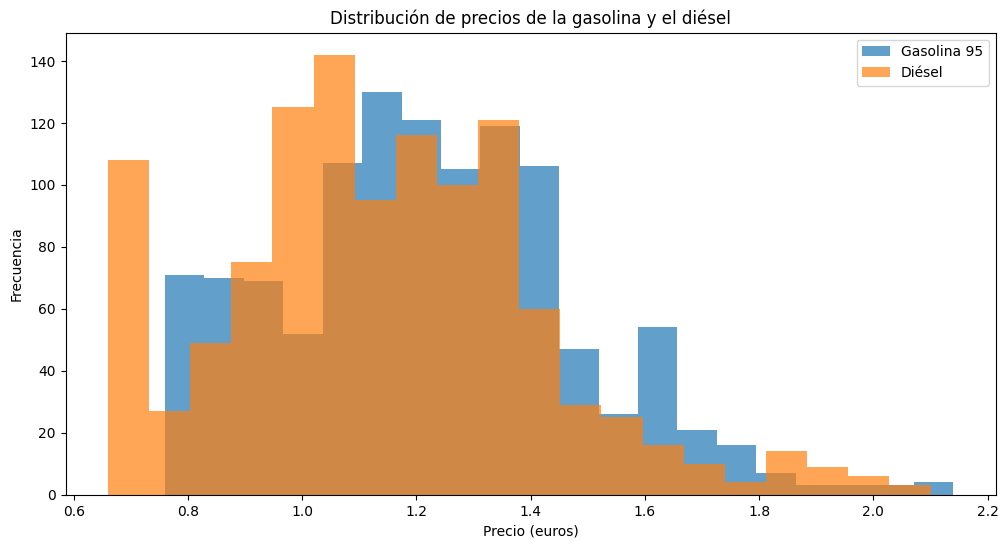

In [15]:

# Histograma de precios
plt.figure(figsize=(12, 6))
plt.hist(data['Precio de la gasolina 95'], bins=20, alpha=0.7, label='Gasolina 95')
plt.hist(data['Precio del diésel'], bins=20, alpha=0.7, label='Diésel')
plt.title('Distribución de precios de la gasolina y el diésel')
plt.xlabel('Precio (euros)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


## Evolución Temporal de los Precios
Estudiamos cómo han cambiado los precios a lo largo del tiempo.

In [16]:
import pandas as pd
import plotly.graph_objects as go

# Verificar los datos antes de limpiar
data['Precio de la gasolina 95'] = pd.to_numeric(
    data['Precio de la gasolina 95'].astype(str).str.replace(',', '.', regex=False),
    errors='coerce'
)

data['Precio del diésel'] = pd.to_numeric(
    data['Precio del diésel'].astype(str).str.replace(',', '.', regex=False),
    errors='coerce'
)

# Verificar si hay valores nulos y manejarlos
data['Precio de la gasolina 95'].fillna(data['Precio de la gasolina 95'].median(), inplace=True)
data['Precio del diésel'].fillna(data['Precio del diésel'].median(), inplace=True)

# Crear figura base
fig = go.Figure()

# Crear un conjunto de datos para cada año
years = sorted(data['Año'].unique())
for year in years:
    yearly_data = data[data['Año'] == year]
    fig.add_trace(
        go.Scatter(
            x=yearly_data['Periodo'],
            y=yearly_data['Precio de la gasolina 95'],
            mode='lines',
            name=f'Gasolina 95 - {year}',
            visible=False
        )
    )
    fig.add_trace(
        go.Scatter(
            x=yearly_data['Periodo'],
            y=yearly_data['Precio del diésel'],
            mode='lines',
            name=f'Diésel - {year}',
            visible=False
        )
    )

# Hacer visible solo el primer año por defecto
for trace in fig.data[:2]:  # Las dos primeras trazas son del primer año
    trace.visible = True

# Crear el slider
steps = []
for i, year in enumerate(years):
    step = dict(
        method="update",
        args=[
            {"visible": [False] * len(fig.data)},  # Ocultar todo
            {"title": f"Evolución de precios en {year}"}  # Cambiar título
        ],
    )
    step["args"][0]["visible"][2 * i] = True  # Mostrar gasolina 95
    step["args"][0]["visible"][2 * i + 1] = True  # Mostrar diésel
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    currentvalue={"prefix": "Año: "},
    y=-0.4
    
)]

fig.update_layout(
    sliders=sliders,
    title="Evolución temporal de los precios de combustibles",
    xaxis_title="Periodo",
    yaxis_title="Precio (€)",
    margin=dict(l=40, r=40, t=80, b=200)
)

fig.show()


C:\Users\Trabajo\AppData\Local\Temp\ipykernel_19480\51777425.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Trabajo\AppData\Local\Temp\ipykernel_19480\51777425.py:17: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac


## Relación con Hechos Históricos
Visualizamos la evolución de los precios con anotaciones de hitos históricos clave.

In [17]:
import plotly.graph_objects as go
import pandas as pd

# Asegúrate de que los datos incluyan las columnas necesarias
# Supongamos que `data` contiene las columnas 'Año', 'Precio de la gasolina 95', y 'Precio del diésel'.

# Calcular precios máximos y mínimos por año
data_grouped = data.groupby('Año').agg({
    'Precio de la gasolina 95': ['max', 'min'],
    'Precio del diésel': ['max', 'min']
}).reset_index()

# Renombrar columnas para mejor legibilidad
data_grouped.columns = ['Año', 'Gasolina Max', 'Gasolina Min', 'Diesel Max', 'Diesel Min']

# Crear trazas de datos
fig = go.Figure()

# Añadir la línea de Gasolina 95
fig.add_trace(go.Scatter(
    x=data_grouped['Año'],
    y=data_grouped['Gasolina Max'],
    mode='lines+markers',
    name='Gasolina 95',
    line=dict(width=2),
    marker=dict(size=6),
    hovertemplate=(
        '<b>Año: %{x}</b><br>'
        'Gasolina Max: %{y:.2f} €<br>'
        'Gasolina Min: %{customdata[0]:.2f} €<extra></extra>'
    ),
    customdata=data_grouped[['Gasolina Min']].to_numpy()
))

# Añadir la línea de Diésel
fig.add_trace(go.Scatter(
    x=data_grouped['Año'],
    y=data_grouped['Diesel Max'],
    mode='lines+markers',
    name='Diésel',
    line=dict(width=2),
    marker=dict(size=6),
    hovertemplate=(
        '<b>Año: %{x}</b><br>'
        'Diésel Max: %{y:.2f} €<br>'
        'Diésel Min: %{customdata[0]:.2f} €<extra></extra>'
    ),
    customdata=data_grouped[['Diesel Min']].to_numpy()
))

# Añadir hitos históricos como anotaciones
hitos = {
    2008: 'Crisis económica global',
    2015: 'Producción de esquisto en EE.UU.',
    2020: 'Pandemia de COVID-19',
    2022: 'Guerra en Ucrania'
}

for año, evento in hitos.items():
    gasolina_max = data_grouped.loc[data_grouped['Año'] == año, 'Gasolina Max'].values[0]
    diesel_max = data_grouped.loc[data_grouped['Año'] == año, 'Diesel Max'].values[0]
    # Añadir un punto para el hito
    fig.add_trace(go.Scatter(
        x=[año],
        y=[gasolina_max],
        mode='markers+text',
        text=[evento],
        textposition="top right",
        marker=dict(color='red', size=10),
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=[año],
        y=[diesel_max],
        mode='markers',
        marker=dict(color='blue', size=10),
        showlegend=False
    ))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Evolución de los precios con hitos históricos destacados',
    xaxis_title='Año',
    yaxis_title='Precio (euros)',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    hovermode="x unified",
    template="plotly_white"
)

# Mostrar gráfico
fig.show()


## fluctuacion de precios por semanas
este grafico mustra la media del precio por semana de ambos combustibles

<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Trabajo\AppData\Local\Temp\ipykernel_19480\4217406655.py:2: SyntaxWarning:

invalid escape sequence '\d'



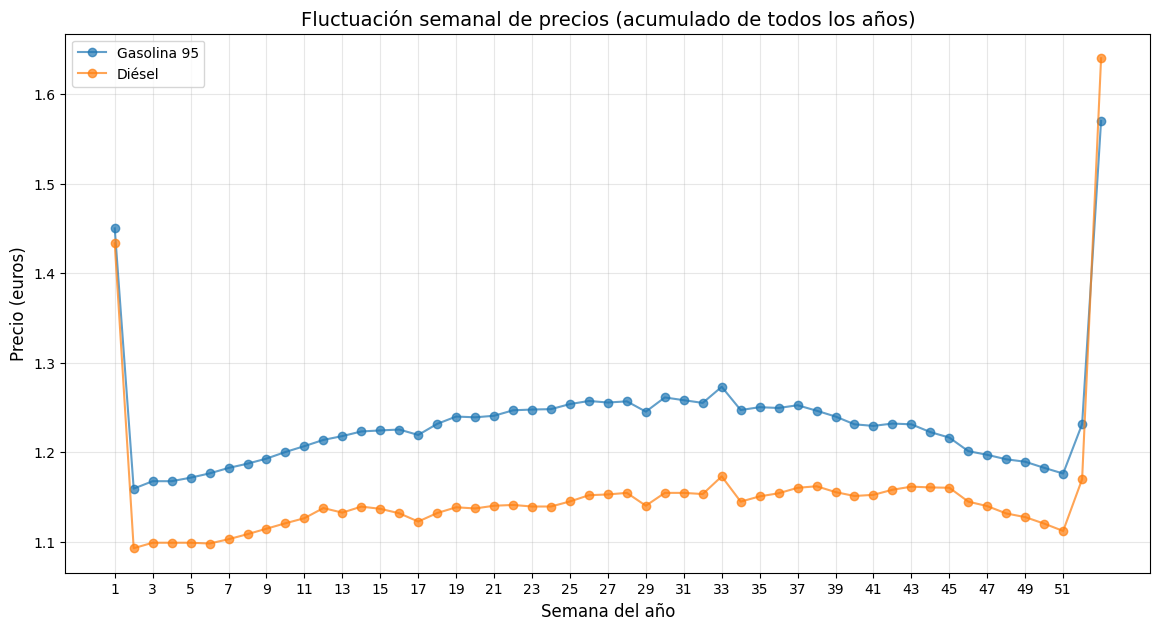

In [18]:
# Extraer solo el número de la semana del periodo
data['Semana'] = data['Periodo'].str.extract('(\d+)', expand=False).astype(int)


weekly_data = data.groupby('Semana')[['Precio de la gasolina 95', 'Precio del diésel']].mean()

# Graficar la fluctuación por semana

plt.figure(figsize=(14, 7))
plt.plot(weekly_data.index, weekly_data['Precio de la gasolina 95'], label='Gasolina 95', marker='o', alpha=0.7)
plt.plot(weekly_data.index, weekly_data['Precio del diésel'], label='Diésel', marker='o', alpha=0.7)



plt.title('Fluctuación semanal de precios (acumulado de todos los años)', fontsize=14)
plt.xlabel('Semana del año', fontsize=12)
plt.ylabel('Precio (euros)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(range(1, 53, 2))  # Mostrar ticks cada 2 semanas para claridad
plt.show()